In [1]:
import requests
import json
import matplotlib.pyplot as plt
import re
import string
import jieba
import jieba.analyse
from wordcloud import WordCloud

In [2]:
token = '<token>'
begin = 1489536000
end = 1521072000
#curl the page of chu chen #given time range #limit100
res = requests.get("https://graph.facebook.com/v2.3/kikuChen?fields=posts.since(" + str(begin) + ").until(" + str(end) + ").limit(100)&created_time&message&access_token=%s"%(token))
jsondata = json.loads(res.text)
print(jsondata)

{'posts': {'data': [{'message': '2015年我在法國出差時，巧遇代表台灣參加《英雄聯盟》世界電競大賽的閃電狼，我抽空到場為他們加油打氣，自此結下不解的緣分。而今天我因公務行程來到台中，順路來到閃電狼的基地探訪，看看這個為台灣帶來榮耀的秘密基地，究竟是什麼樣子？\n\n去年7月，《英雄聯盟》的亞洲對抗賽在高雄展覽館火熱展開，而位在亞洲新灣區、海音中心的其中一尾小鯨魚亦與台灣電競公司(TESL)簽約，將成為南台灣電競的基地。\n\n另外，高雄也順利的爭取到2018年IeSF電競世界錦標賽的主辦權，將於今年11月在高雄盛大開戰，預計能夠吸引50國、1200位頂尖電競選手齊聚台灣，更是這項國際賽事首度在台舉辦，我們也會以最高的規格來舉辦。\n\n電競是國際爭相發展的新興產業，高雄擁有海空雙港的區位優勢，更有日趨完善的大眾運輸系統，最適合舉辦大型的國際賽事、研討會及展覽。未來市府也將持續努力，帶動電競產業及競賽、會展產業的發展。', 'story': '陳菊 (花媽) 市長 added 3 new photos.', 'created_time': '2018-03-14T15:06:04+0000', 'id': '232716627404_10155406529362405'}, {'message': '萬眾矚目的衛武營國家藝術文化中心將於今年10月啟用開幕，新建場館工程於去年10月竣工，室內四廳院的設計及功能都各具特色，包括以歌劇、大型戲劇、舞蹈及跨領域等表演型式的大型舞台的歌劇院；全臺灣獨一無二的葡萄園式座席設計，特殊設計讓不同高度位置的觀眾同樣享受最佳的聲音與視野的音樂廳；作為各種戲劇、舞蹈表演的演出空間，可視實際使用需求調整不同舞台形式的戲劇院；提供室內樂、獨奏及其他小型表演使用的表演廳。\n\n其中，尤以臺灣首座葡萄園式音樂廳及亞洲最大的音樂廳演奏用管風琴最具代表性，所以今天我與文化部鄭麗君部長一起聽取「音樂廳」及「表演廳」導覽，並實地檢視工程環境品質，感受臺灣最先進表演場地的魅力，也請所有朋友密切注意今年10月衛武營國家藝術文化中心帶來的一系列開幕演出。', 'story': '陳菊 (花媽) 市長 added 5 new photos.', 'created_time': '2018-03-14T11:00:15+0000'

In [3]:
#data cleaning
dat = jsondata['posts']['data']
posts = []
for m in dat:
    if 'message' in m:
        posts.append(m['message'])
posts = ''.join(map(str, posts))
posts = re.sub('['+string.punctuation+']', '', posts)
posts = re.sub(r'[a-zA-Z0-9！？?〞＃●＄％《❤。＆’（）＊＋｜※，－╱︰；＜＝＞＠〔╲〕　＿ˋ｛∣｝∼?????、〃》「」『』【】﹝﹞【】?????〝〞????–—‘’?“”??…?﹏.：]+', '', posts)

In [4]:
#cut words
jieba.load_userdict('D:\CSXdata\dict\mydict.dic')
jieba.add_word('高雄')
word_list = ' '.join(jieba.cut(posts, cut_all = False, HMM = False))
print(word_list)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\OLIVIA~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.635 seconds.
Prefix dict has been built succesfully.


年 我在 法國 出差 時 巧遇 代表 台灣 參加 英雄聯盟 世界 電競 大賽 的 閃電狼 我 抽空 到場 為他們 加油打氣 自此 結下 不解 的 緣分 而 今天 我 因 公務 行程 來到 台 中 順路來 到 閃電狼 的 基地 探訪 看看 這個 為台灣帶來 榮耀 的 秘密基地 究竟是什麼 樣子 
 
 去年 月 英雄聯盟 的 亞洲 對抗賽 在 高雄展覽館 火熱 展開 而 位在 亞洲新灣區 海 音 中心 的 其中 一尾 小 鯨魚 亦 與 台灣 電競 公司 簽約 將成為 南 台灣 電競 的 基地 
 
 另外 高雄 也 順利的 爭取到 年 電競 世界錦標賽 的 主辦權 將於今年 月 在 高雄 盛大開戰 預計 能夠 吸引 國 位 頂尖 電競選手 齊聚 台灣 更是 這項 國際賽事 首度在台 舉辦 我們 也會 以 最高的 規格 來 舉辦 
 
 電競 是 國際 爭相 發展 的 新興產業 高雄 擁有 海空 雙 港 的 區位優勢 更有 日趨完善 的 大眾運輸 系統 最適合 舉辦大型 的 國際賽事 研討會 及 展覽 未來 市府也將 持續努力 帶動 電競產業 及 競賽 會展產業 的 發展 萬眾矚目 的 衛武營 國家 藝術文化 中心 將於今年 月 啟用 開幕 新建 場館 工程 於 去年 月竣工 室內 四 廳 院 的 設計 及 功能 都各具特色 包括 以 歌劇 大型 戲劇 舞蹈 及 跨領域 等 表演 型式 的 大型 舞台 的 歌劇院 全 臺灣 獨一無二的 葡萄園 式 座席 設計 特殊 設計 讓 不同 高度 位置 的 觀眾 同樣 享受 最佳的 聲音 與 視野 的 音樂廳 作為 各種 戲劇 舞蹈表演 的 演出 空間 可 視 實際使用 需求 調整 不同 舞台 形式 的 戲劇院 提供 室內樂 獨奏 及其他 小型 表演 使用 的 表演廳 
 
 其中尤以 臺灣 首座 葡萄園 式 音樂廳 及 亞洲最大 的 音樂廳 演奏 用 管風琴 最具 代表性 所以 今天 我 與 文化部 鄭麗君部長 一起 聽取 音樂廳 及 表演廳 導覽 並 實地 檢視 工程 環境品質 感受 臺灣 最 先進 表演場地 的 魅力 也 請 所有 朋友 密切注意 今年 月 衛武營 國家 藝術文化 中心 帶來 的 一系列 開幕演出 首先要 恭喜 宋欣穎 導演 昨天 在 日本 以 幸福路上 贏得東京 國際 動畫 節 的 最佳長片 
 
 猶記得

In [5]:
#extract the most important 200 words
jieba.analyse.set_stop_words('D:\CSXdata\dict\mystop.txt')
word_list = jieba.analyse.extract_tags(word_list, topK = 200, withWeight = False, allowPOS = ())
word_list = ' '.join(word_list)
print(word_list)

高雄 高雄市 市府 台灣 市民朋友 國際 發展 感謝 市府團隊 參加 輕軌 未來 成為 推動 歷史 來到 社區 臺灣 區域 計畫 進行 努力 設計 環境 服務 協助 朋友 農業 舉辦 參與 規劃 建設 村里 停水 社會 透過 三民 團隊 毒品防制 山區 今天是 邀請 藝術節 城市 今年 空間 照顧 全國 讓我們 林園 公所 系統 高雄市政府 繼續努力 仁武 魚市場 提升 合作 工程 中心 打造 配合 所有 蜜棗 持續 地區 公園 全部 大家 希望 亞洲新灣區 也會 兒童 鼓勵 榮獲 我也 現場 也是 在此 愛河 景觀 結合 參拜 公頃 森林公園 落實 寶珠 商圈 市民 安全 幸福路上 相關 看見 轉播 觀光 產業 志工 母語 轉型 過好年 開闢 縣市合併 發車 科技 公尺 導演 這次 我們的 婦女 為此 行動 農特產 資源 體驗 價值 創意 遊客 設施 針對 紅包 獲得 在這裡 過去一年 民眾 以來 鐵路地下化 作業 貨櫃 產銷班 志願服務 高雄人 女性 包括 楠梓 大社 搭乘 支持 年度 藉由 每年 預計 能夠 動畫 過去 讓市民 投資 快樂 成長 創造 自來水公司 辦理 恢復 敬請 事項 相關資訊 委員會 建構 成績 守護 綠色 近年來 經濟 都是 業者 加強 設置 讓所有 左營舊城 高雄燈會 我們一起 新的一年 建築 有許多 公共工程 環狀 特優獎 陳菊市長 送紅包 特別 美麗 新年快樂 這座城市 務必 品質 感謝所有 夢時代 渡輪 長輩 在地 檢查 營造 績優 興里 醫院 專區 捷運 績效 資源回收 工作 多元


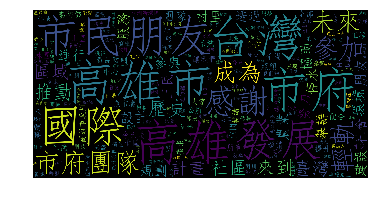

In [6]:
#generate wordcloud
font = r'C:\Windows\Fonts\simfang.ttf'
wordcloud = WordCloud( font_path = font, background_color="black", width=1600, height=800).generate( word_list )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()